(3524, 4) (1175, 4)
(3524,) (1175,)
50.8936170212766
              precision    recall  f1-score   support

          -1       0.52      0.86      0.65       610
           1       0.46      0.13      0.20       565

   micro avg       0.51      0.51      0.51      1175
   macro avg       0.49      0.49      0.42      1175
weighted avg       0.49      0.51      0.43      1175

[[527  83]
 [494  71]]
[-1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1
 -1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1
 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1
 -1 -1 -1  1]
[-1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1

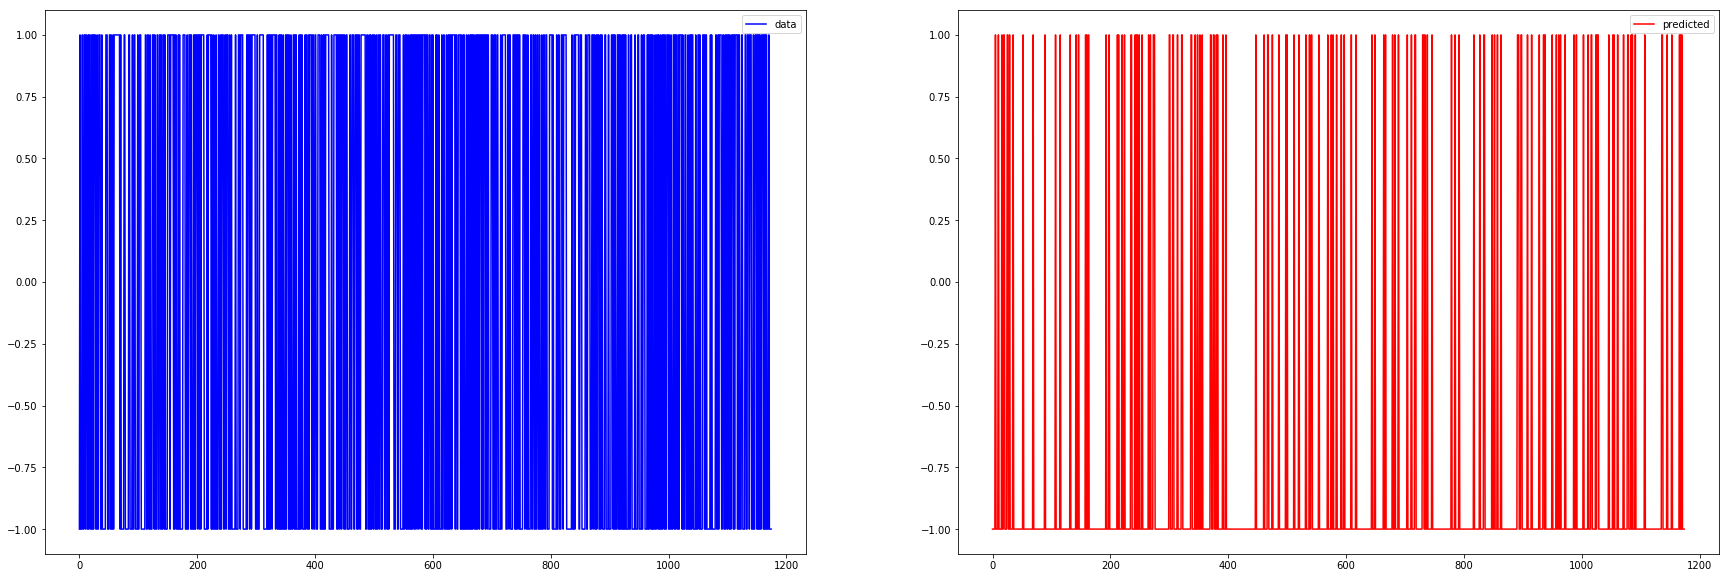

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\Kavya\Downloads\INFY.NS.csv") # read csv file
df = df.dropna(how='any',axis=0) #drop null values
#df=df.iloc[::-1].reset_index(drop=True) #reverse the rows of a dataframe
df['openclose']=(df.Open-df.Close)/df.Open
#openclose
df['highlow']=(df.High-df.Low)/df.Low
#highlow
df['perchange']=df['Adj Close'].pct_change()
#perchange
df['std']=df['perchange'].std()
#std
df['ret']=df['perchange'].mean()
#ret
x=df[['openclose','highlow','std','ret']]

y=np.where(df['Adj Close'].shift(-1)<df['Adj Close'],1,-1)


datasetlen=df.shape[0]
#print(datasetlen)
split=int(datasetlen*0.75)
split
xtrain,xtest=x[:split],x[split:]
ytrain,ytest=y[:split],y[split:]
#xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.9,test_size=0.1)
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)
clf=RandomForestClassifier(n_estimators=10,max_depth=3,random_state=42)
clf.fit(xtrain,ytrain)
print( accuracy_score(ytest, clf.predict(xtest), normalize=True)*100.0)
from sklearn.metrics import classification_report
report = classification_report(ytest, clf.predict(xtest))
print(report)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))
#ax1.plot(ytest,color='green',label='actual')
ax1.plot(range(len(ytest)),ytest,color='blue',label='data')
ax2.plot(range(len(ytest)),clf.predict(xtest),color='red',label='predicted')

#print(df['Adj Close'].shift(-1))
#print(df['Adj Close'])
#print(y)

ax1.legend()
ax2.legend()
Test_data = [[20000612]]
prediction = clf.predict(Test_data)
print(prediction)
print(xtest)
print(confusion_matrix(ytest,clf.predict(xtest)))
#print(ytest[:100])
#print("----")
#print(clf.predict(xtest[:100]))










